In [1]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("./common/data"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

['chest_xray', 'test', 'train', 'val']


Using TensorFlow backend.


# Load Data

In [2]:
train_folder= './common/data/chest_xray/train/'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [3]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [4]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

234
normal picture title:  NORMAL2-IM-0350-0001.jpeg
pneumonia picture title: person1653_virus_2858.jpeg


Text(0.5, 1.0, 'Pneumonia')

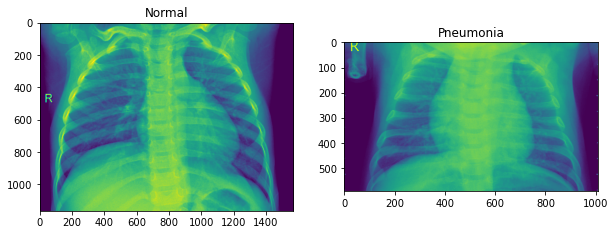

In [5]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# plot images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Generate Dataset from image data

In [6]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/') 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [7]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [8]:
cnn_model = cnn.fit_generator(training_set, validation_generator)

Epoch 1/20
163/163 [==============================] - 203s 1s/step - loss: 0.3388 - accuracy: 0.8533 - val_loss: 0.3600 - val_accuracy: 0.8125
Epoch 2/20
163/163 [==============================] - 189s 1s/step - loss: 0.2141 - accuracy: 0.9130 - val_loss: 0.6513 - val_accuracy: 0.6875
Epoch 3/20
163/163 [==============================] - 189s 1s/step - loss: 0.2127 - accuracy: 0.9112 - val_loss: 0.2650 - val_accuracy: 0.9375
Epoch 4/20
163/163 [==============================] - 192s 1s/step - loss: 0.1686 - accuracy: 0.9325 - val_loss: 0.3218 - val_accuracy: 0.8125
Epoch 5/20
163/163 [==============================] - 192s 1s/step - loss: 0.1945 - accuracy: 0.9252 - val_loss: 0.7405 - val_accuracy: 0.6875
Epoch 6/20
163/163 [==============================] - 191s 1s/step - loss: 0.1679 - accuracy: 0.9327 - val_loss: 0.2990 - val_accuracy: 0.8125
Epoch 7/20
163/163 [==============================] - 193s 1s/step - loss: 0.1632 - accuracy: 0.9352 - val_loss: 0.4104 - val_accuracy: 0.8125